In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [2]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y1.joblib')
#ACCESS_CM2_LR = load('ACCESS-CM2-LR-Y.joblib')
#ACCESS_CM2_SVR = load('ACCESS-CM2-SVR-Y.joblib')

CanESM5_CNN = load('CanESM5-CNN-Y.joblib')
#CanESM5_LR = load('CanESM5-LR-Y.joblib')
#CanESM5_SVR = load('CanESM5-SVR-Y.joblib')

IITMESM_CNN = load('IITM-ESM-CNN-Y1.joblib')
#IITMESM_LR = load('IITM-ESM-LR-Y.joblib')
#IITMESM_SVR = load('IITM-ESM-SVR-Y.joblib')

INM_CM4_8_CNN = load('INM-CM4-8-CNN-Y.joblib')
#INM_CM4_8_LR = load('INM-CM4-8-LR-Y.joblib')
#INM_CM4_8_SVR = load('INM-CM4-8-SVR-Y.joblib')

INM_CM5_0_CNN = load('INM-CM5-0-CNN-Y.joblib')
#INM_CM5_0_LR = load('INM-CM5-0-LR-Y.joblib')
#INM_CM5_0_SVR = load('INM-CM5-0-SVR-Y.joblib')

IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y1.joblib')
#IPSL_CM6A_LR_LR = load('IPSL-CM6A-LR-LR-Y.joblib')
#IPSL_CM6A_LR_SVR = load('IPSL-CM6A-LR-SVR-Y.joblib')

MIROC6_CNN = load('MIROC6-CNN-Y.joblib')
#MIROC6_LR = load('MIROC6-LR-Y.joblib')
#MIROC6_SVR = load('MIROC6-SVR-Y.joblib')

MRI_ESM2_0_CNN = load('MRI-ESM2-0-CNN-Y.joblib')
#MRI_ESM2_0_LR = load('MRI-ESM2-0-LR-Y.joblib')
#MRI_ESM2_0_SVR = load('MRI-ESM2-0-SVR-Y.joblib')

MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y1.joblib')
#MPI_ESM1_2_LR_LR = load('MPI-ESM1-2-LR-LR-Y.joblib')
#MPI_ESM1_2_LR_SVR = load('MPI-ESM1-2-LR-SVR-Y.joblib')

MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')
#MPI_ESM1_2_HR_LR = load('MPI-ESM1-2-HR-LR-Y.joblib')
#MPI_ESM1_2_HR_SVR = load('MPI-ESM1-2-HR-SVR-Y.joblib')

EC_Earth3_CNN = load('EC-Earth3-CNN-Y1.joblib')
#EC_Earth3_LR = load('EC-Earth3-LR-Y.joblib')
#EC_Earth3_SVR = load('EC-Earth3-SVR-Y.joblib')
y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0.32, 0.4 , 0.4 , ..., 0.24, 0.36, 0.36])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [3]:
y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
LR.values=LR.where(LR>=0.46,0)
SVR.values=SVR.where(SVR>=0.46,0)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)
#ACCESS_CM2_LR.values=ACCESS_CM2_LR.where(ACCESS_CM2_LR>=0.46,0)
#ACCESS_CM2_SVR.values=ACCESS_CM2_SVR.where(ACCESS_CM2_SVR>=0.46,0)

CanESM5_CNN.values=CanESM5_CNN.where(CanESM5_CNN>=0.46,0)
#CanESM5_LR.values=CanESM5_LR.where(CanESM5_LR>=0.46,0)
#CanESM5_SVR.values=CanESM5_SVR.where(CanESM5_SVR>=0.46,0)

INM_CM4_8_CNN.values=INM_CM4_8_CNN.where(INM_CM4_8_CNN>=0.46,0)
#INM_CM4_8_LR.values=INM_CM4_8_LR.where(INM_CM4_8_LR>=0.46,0)
#INM_CM4_8_SVR.values=INM_CM4_8_SVR.where(INM_CM4_8_SVR>=0.46,0)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)
#IITMESM_LR.values=IITMESM_LR.where(IITMESM_LR>=0.46,0)
#IITMESM_SVR.values=IITMESM_SVR.where(IITMESM_SVR>=0.46,0)

INM_CM5_0_CNN.values=INM_CM5_0_CNN.where(INM_CM5_0_CNN>=0.46,0)
#INM_CM5_0_LR.values=INM_CM5_0_LR.where(INM_CM5_0_LR>=0.46,0)
#INM_CM5_0_SVR.values=INM_CM5_0_SVR.where(INM_CM5_0_SVR>=0.46,0)

IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)
#IPSL_CM6A_LR_LR.values=IPSL_CM6A_LR_LR.where(IPSL_CM6A_LR_LR>=0.46,0)
#IPSL_CM6A_LR_SVR.values=IPSL_CM6A_LR_SVR.where(IPSL_CM6A_LR_SVR>=0.46,0)

MIROC6_CNN.values=MIROC6_CNN.where(MIROC6_CNN>=0.46,0)
#MIROC6_LR.values=MIROC6_LR.where(MIROC6_LR>=0.46,0)
#MIROC6_SVR.values=MIROC6_SVR.where(MIROC6_SVR>=0.46,0)

MRI_ESM2_0_CNN.values=MRI_ESM2_0_CNN.where(MRI_ESM2_0_CNN>=0.46,0)
#MRI_ESM2_0_LR.values=MRI_ESM2_0_LR.where(MRI_ESM2_0_LR>=0.46,0)
#MRI_ESM2_0_SVR.values=MRI_ESM2_0_SVR.where(MRI_ESM2_0_SVR>=0.46,0)

MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)
#MPI_ESM1_2_LR_LR.values=MPI_ESM1_2_LR_LR.where(MPI_ESM1_2_LR_LR>=0.46,0)
#MPI_ESM1_2_LR_SVR.values=MPI_ESM1_2_LR_SVR.where(MPI_ESM1_2_LR_SVR>=0.46,0)

MPI_ESM1_2_HR_CNN.values=MPI_ESM1_2_HR_CNN.where(MPI_ESM1_2_HR_CNN>=0.46,0)
#MPI_ESM1_2_HR_LR.values=MPI_ESM1_2_HR_LR.where(MPI_ESM1_2_HR_LR>=0.46,0)
#MPI_ESM1_2_HR_SVR.values=MPI_ESM1_2_HR_SVR.where(MPI_ESM1_2_HR_SVR>=0.46,0)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)
#EC_Earth3_LR.values=EC_Earth3_LR.where(EC_Earth3_LR>=0.46,0)
#EC_Earth3_SVR.values=EC_Earth3_SVR.where(EC_Earth3_SVR>=0.46,0)

y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [4]:
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
LR.values=LR.where(LR==0.0,1)
SVR.values=SVR.where(SVR==0.0,1)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)
#ACCESS_CM2_LR.values=ACCESS_CM2_LR.where(ACCESS_CM2_LR==0.0,1)
#ACCESS_CM2_SVR.values=ACCESS_CM2_SVR.where(ACCESS_CM2_SVR==0.0,1)

CanESM5_CNN.values=CanESM5_CNN.where(CanESM5_CNN==0.0,1)
#CanESM5_LR.values=CanESM5_LR.where(CanESM5_LR==0.0,1)
#CanESM5_SVR.values=CanESM5_SVR.where(CanESM5_SVR==0.0,1)

INM_CM4_8_CNN.values=INM_CM4_8_CNN.where(INM_CM4_8_CNN==0.0,1)
#INM_CM4_8_LR.values=INM_CM4_8_LR.where(INM_CM4_8_LR==0.0,1)
#INM_CM4_8_SVR.values=INM_CM4_8_SVR.where(INM_CM4_8_SVR==0.0,1)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)
#IITMESM_LR.values=IITMESM_LR.where(IITMESM_LR==0.0,1)
#IITMESM_SVR.values=IITMESM_SVR.where(IITMESM_SVR==0.0,1)

INM_CM5_0_CNN.values=INM_CM5_0_CNN.where(INM_CM5_0_CNN==0.0,1)
#INM_CM5_0_LR.values=INM_CM5_0_LR.where(INM_CM5_0_LR==0.0,1)
#INM_CM5_0_SVR.values=INM_CM5_0_SVR.where(INM_CM5_0_SVR==0.0,1)

IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)
#IPSL_CM6A_LR_LR.values=IPSL_CM6A_LR_LR.where(IPSL_CM6A_LR_LR==0.0,1)
#IPSL_CM6A_LR_SVR.values=IPSL_CM6A_LR_SVR.where(IPSL_CM6A_LR_SVR==0.0,1)

MIROC6_CNN.values=MIROC6_CNN.where(MIROC6_CNN==0.0,1)
#MIROC6_LR.values=MIROC6_LR.where(MIROC6_LR==0.0,1)
#MIROC6_SVR.values=MIROC6_SVR.where(MIROC6_SVR==0.0,1)

MRI_ESM2_0_CNN.values=MRI_ESM2_0_CNN.where(MRI_ESM2_0_CNN==0.0,1)
#MRI_ESM2_0_LR.values=MRI_ESM2_0_LR.where(MRI_ESM2_0_LR==0.0,1)
#MRI_ESM2_0_SVR.values=MRI_ESM2_0_SVR.where(MRI_ESM2_0_SVR==0.0,1)

MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)
#MPI_ESM1_2_LR_LR.values=MPI_ESM1_2_LR_LR.where(MPI_ESM1_2_LR_LR==0.0,1)
#MPI_ESM1_2_LR_SVR.values=MPI_ESM1_2_LR_SVR.where(MPI_ESM1_2_LR_SVR==0.0,1)

MPI_ESM1_2_HR_CNN.values=MPI_ESM1_2_HR_CNN.where(MPI_ESM1_2_HR_CNN==0.0,1)
#MPI_ESM1_2_HR_LR.values=MPI_ESM1_2_HR_LR.where(MPI_ESM1_2_HR_LR==0.0,1)
#MPI_ESM1_2_HR_SVR.values=MPI_ESM1_2_HR_SVR.where(MPI_ESM1_2_HR_SVR==0.0,1)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)
#EC_Earth3_LR.values=EC_Earth3_LR.where(EC_Earth3_LR==0.0,1)
#EC_Earth3_SVR.values=EC_Earth3_SVR.where(EC_Earth3_SVR==0.0,1)
 
y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [5]:
def getFogTS( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=list()
    
    for yr in range(1981,2015,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        ySMean = dArray.sel(time=slice(dStart,dEnd)).sum(dim='time').values.tolist()
        #print(yAct)
        fg.append(ySMean)
        
    
    return fg

In [6]:
fO=getFogTS(y)
ObsMean=st.mean(fO)
print(ObsMean)
ObsStd=st.stdev(fO)
print(ObsStd)

13.5
11.098047876390995


In [7]:
pow(4, 2)

16

In [8]:
RE=list()
IVS=list()
REIVS=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,
       MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
fListNames=('y','LR','SVR','CNN','ACCESS_CM2_CNN','CanESM5_CNN','IITMESM_CNN','INM_CM4_8_CNN','INM_CM5_0_CNN' ,'IPSL_CM6A_LR_CNN',
            'MIROC6_CNN','MRI_ESM2_0_CNN', 'MPI_ESM1_2_LR_CNN', 'MPI_ESM1_2_HR_CNN','EC_Earth3_CNN')
for fL,fn in zip(fList,fListNames) :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    REIVS.append([fn,re1,ivs1])

 
    
    
print(RE)    
print(IVS)

df = pd.DataFrame (REIVS,columns=['Name','RE','IVS'])
print (df)

    
    


[0.0, -38.56209150326797, -42.0479302832244, -9.150326797385615, -31.154684095860564, -53.812636165577345, -34.85838779956427, -62.527233115468405, -62.091503267973856, -29.19389978213508, -47.930283224400874, -38.56209150326797, -32.24400871459696, -42.48366013071895, -16.12200435729847]
[0.0, 0.046288274846054404, 0.14243082666074194, 0.07836110416648762, 0.12605129519086472, 1.49004962570335, 1.1372180655599056, 4.39540514432386, 2.9719878946255225, 0.16829752517940028, 1.6901496318361964, 1.0554881670814704, 0.24077480688466074, 0.44402202589202244, 0.07141242142630015]
                 Name         RE       IVS
0                   y   0.000000  0.000000
1                  LR -38.562092  0.046288
2                 SVR -42.047930  0.142431
3                 CNN  -9.150327  0.078361
4      ACCESS_CM2_CNN -31.154684  0.126051
5         CanESM5_CNN -53.812636  1.490050
6         IITMESM_CNN -34.858388  1.137218
7       INM_CM4_8_CNN -62.527233  4.395405
8       INM_CM5_0_CNN -62.091503

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


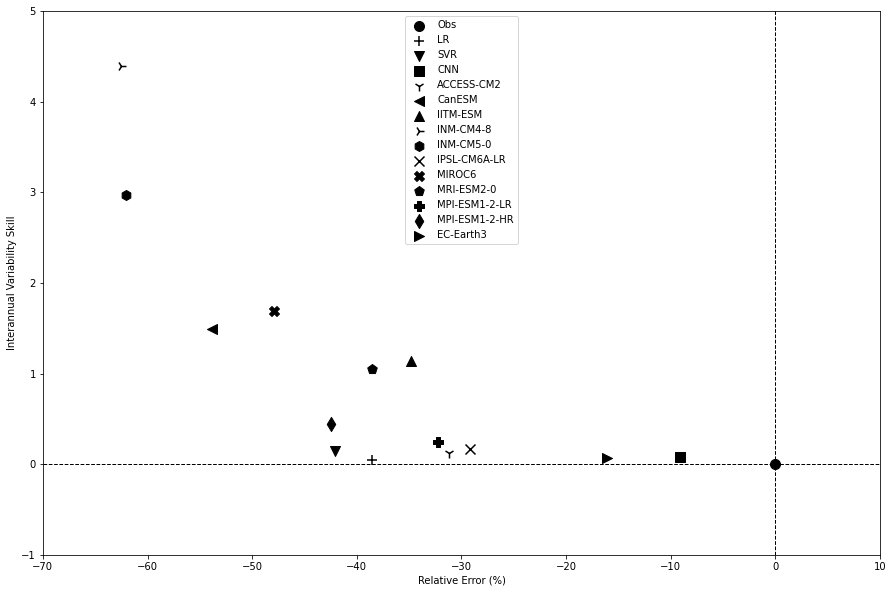

In [9]:

import matplotlib.patches as mpatches
classes = ['Obs','LR','SVR','CNN','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR',
           'MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
#class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']
class_colours = ['black','black','black','black','black','black','black',
                 'black','black','black','black','black','black','black','black']
markers=['o','+','v','s','1','<','^','4','h','x','X','p','P','d','>']

figure, axes = plt.subplots(figsize=(15,10))


for r,i,m,c in zip(RE,IVS,markers,classes):
    plt.scatter(r, i, c='black', marker=m, label=c,s=100)
plt.ylim(top=5) #ymax is your value
plt.ylim(bottom=-1) #ymin is your value
plt.xlim(right=10) #xmax is your value
plt.xlim(left=-70) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-70, 10], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.legend()


plt.savefig('WFDays_RE_IVS.eps')
plt.show()

#recs = []
#for i in range(0,len(class_colours)):
#    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
#plt.legend(recs,classes,loc=4)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.0, -31.154684095860564, -53.812636165577345, -34.85838779956427, -62.527233115468405, -62.091503267973856, -29.19389978213508, -47.930283224400874, -38.56209150326797, -32.24400871459696, -42.48366013071895, -16.12200435729847]
[0.0, 0.12605129519086472, 1.49004962570335, 1.1372180655599056, 4.39540514432386, 2.9719878946255225, 0.16829752517940028, 1.6901496318361964, 1.0554881670814704, 0.24077480688466074, 0.44402202589202244, 0.07141242142630015]


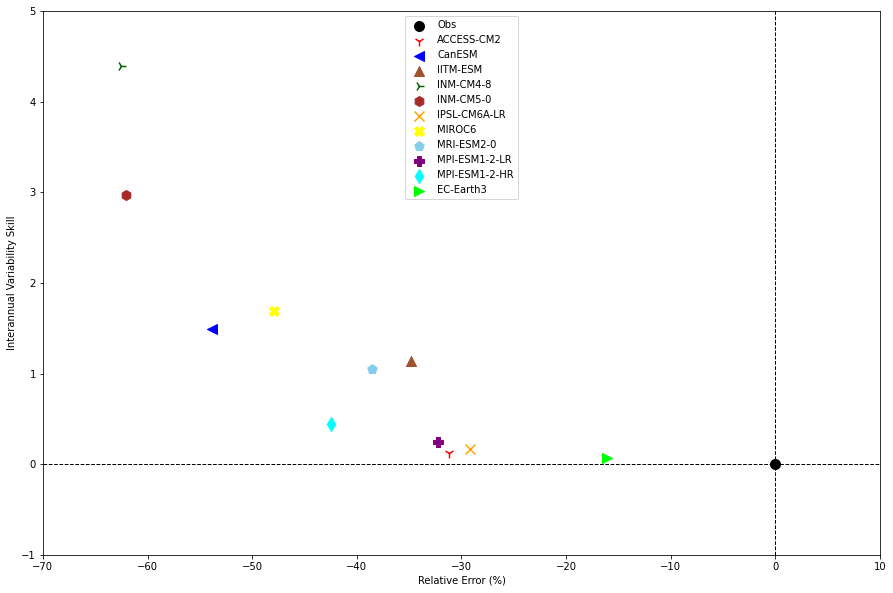

In [11]:


import matplotlib.patches as mpatches


RE=list()
IVS=list()
fList=(y,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,
       MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)

import matplotlib.patches as mpatches
classes = ['Obs','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR',
           'MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
#class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']
class_colours = ['black','black','black','black','black','black','black',
                 'black','black','black','black','black','black','black','black']
markers=['o','1','<','^','4','h','x','X','p','P','d','>']
rangs=['black','red','blue','sienna','darkgreen','brown','orange',
                 'yellow','skyblue','purple','aqua','lime']


figure, axes = plt.subplots(figsize=(15,10))


for r,i,m,c,ra in zip(RE,IVS,markers,classes,rangs):
    plt.scatter(r, i,c=ra,  marker=m, label=c,s=100)
plt.ylim(top=5) #ymax is your value
plt.ylim(bottom=-1) #ymin is your value
plt.xlim(right=10) #xmax is your value
plt.xlim(left=-70) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-70, 10], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.legend()


plt.savefig('WFDays_RE_IVS.eps')
plt.show()

#recs = []
#for i in range(0,len(class_colours)):
#    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
#plt.legend(recs,classes,loc=4)